# Aula 4 - Regressão Logística

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução
- 2) Regressão logística
- 4) Métricas de performance para problemas de classificação

____
____
____

## 1) Introdução

**Problemas de classificação** são aqueles em que queremos determinar a que **categoria ou classe** dentro de um **conjunto discreto de classes** uma dada observação pertence, com base em suas features.

Para isso, construímos um **classificador**: modelo que tem como input as features (contínuas ou discretas) e como output uma entre as classes (discretas).

> Principal diferença entre problemas de regressão e classificação:
> - Regressão: valores contínuos;
> - Classificação: valores (classes) discretas (binárias ou não).

No caso de regressão, a hipótese será a equação que determina o target diretamente;

No caso de classificação, a hipótese tem o objetivo de **separar as diferentes classes**. Por isso, muitas vezes utilizamos o termo **fonteira de classificação**, ou **fronteira de decisão**. De um lado da fronteira, temos uma classe; do outro, a outra classe.

<img src="https://i0.wp.com/vinodsblog.com/wp-content/uploads/2018/11/Classification-vs-Regression.png?fit=2048%2C1158&ssl=1" width=700>

<img src="https://i.pinimg.com/originals/71/8e/6a/718e6a40e1782bead960e58d3c52663b.png" width=300>

Problemas de classificação são comumente divididos com relação ao **número de classes** a serem preditas (isto é, com relação à estrutura do espaço de target):

- Classificação binária: duas classes (0 e 1);
- Classificação multiclasse: $n$ classes (0, 1, ..., $n-1$), com $n > 2 \in \mathbb{N}$

Exemplos de problemas de classificação:
- Detecção de e-mails SPAM: um e-mail é SPAM ou não?;
    - Features: palavras contidas no corpo do e-mail; remetente; assunto;
- Detecção de doenças: que codição médica a pessoa tem?
    - Features: sintomas fisiológicos; resultados de exames (medidas de variáveis biológicas);
- Detecção do tipo de documento: secreto, confidencial ou não-sensível?
    - Features: palavras no corpo do texto; título;
- Detecção de fraudes de cartão de crédito: uma operação é fraudulenta ou não?;
    - Features: histórico de transações; hora, local e frequência das transações; tipo de compra;
- Modelo de risco de crédito: qual é a chance de determinada pessoa não pagar seu empréstimo?
    - Features: histórico de pagamento; score de crédito;
    
    
<img src="https://developers.google.com/machine-learning/guides/text-classification/images/TextClassificationExample.png" width=500>



Veremos hoje um dos mais simples e importantes classificadores: a **Regressão Logística!**

Antes de conhecermos o método, vamos dar uma rápida olhada na base qual a qual trabalharemos hoje!

__________________

Para introduzirmos as ideias, utilizaremos um dataset de marketing (propagandas/advertising), que está disponível no <a href="https://www.kaggle.com/fayomi/advertising">Kaggle</a>. Este é um dataset artificial e didático, com os dados bem separáveis, o que é ótimo para ilustração!<br>

Visite o Kaggle e procure por "advertising" para datasets relacionados reais e ainda mais interessantes

A base que utilizaremos contém as seguintes colunas:

* 'Daily Time Spent on Site': tempo que o cliente ficou no site (em minutos);
* 'Age': idade do cliente (em anos);
* 'Area Income': média salarial (por ano) da região geográfica do cliente;
* 'Daily Internet Usage': tempo médio (em minutos) que o cliente fica na internet;
* 'Ad Topic Line': título do anúncio;
* 'City': cidade do cliente;
* 'Male': dummy indicando se o cliente é do sexo masculino (1) ou não (0);
* 'Country': país do cliente;
* 'Timestamp': marcação de tempo em que o cliente clickou no anúncio OU fechou a página
* 'Clicked on Ad': dummy indicando se o cliente clickou no anúncio (1) ou não (0).

Nosso objetivo é criar um modelo que possa prever se um determinado usuário clickará em um anúncio online ou não, com base em suas características pessoais/comportamentais, bem como informações relativas ao anúncio.

Tomamos como variáveis independentes (preditores/features) as primeiras 9 colunas, enquanto nossa variável dependente (target) é a última coluna ("Clicked on Ad").

Ou seja, nosso modelo deve ser capaz de dizer se um usuário com um conjunto particular das 9 features clickará no anúncio ou não. 

__IMPORTANTE!__

Pense no problema de negócio que estamos querendo resolver com nosso modelo -- direcionamento de marketing! Temos os dados dos nossos clientes (customer-centric), nós os conhecemos! Não podemos utilizar essa informação a nosso favor?

Talvez não faça sentido exibir o anúncio para um usuário que tem baixa probabilidade de clickar no ad, não é mesmo? 

Por outro lado, é muito mais eficiente direcionar nosso marketing aos clientes com alta chance de clickar no nosso anúncio!

Assim, economizamos dinheiro (todo anúncio é pago!), e ganhamos em eficiência e alcance!

___
___
___

In [1]:
# imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

O código abaixo é apenas para formatar os números em até 3 casas decimais. 

Fica aqui pra conhecimento e também pq vai nos auxiliar a ver melhor as probabilidades no final.

In [2]:
pd.set_option("display.float_format", lambda x: "%.3f" % x)

np.set_printoptions(suppress=True, precision=3)

Vamos ler a base!

In [3]:
df = pd.read_csv("datasets/advertising.csv")

In [4]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.950,35,61833.900,256.090,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.230,31,68441.850,193.770,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.470,26,59785.940,236.500,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.150,29,54806.180,245.890,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.370,35,73889.990,225.580,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.970,30,71384.570,208.580,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.300,45,67782.170,134.420,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.630,51,42415.720,120.370,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.550,19,41920.790,187.950,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
mean,65.000,36.009,55000.000,180.000,0.481,0.500
std,15.854,8.786,13414.634,43.902,0.500,0.500
min,32.600,19.000,13996.500,104.780,0.000,0.000
25%,51.360,29.000,47031.802,138.830,0.000,0.000
50%,68.215,35.000,57012.300,183.130,0.000,0.500
75%,78.547,42.000,65470.635,218.792,1.000,1.000
max,91.430,61.000,79484.800,269.960,1.000,1.000


In [7]:
df["Clicked on Ad"].unique()

array([0, 1], dtype=int64)

### TODO: EDA em casa

__________

Agora que conhecemos brevemente o problema, vamos conhecer o método de modelagem!

> Nossa discussão será feita toda em cima do problema de **classificação binária**, ou seja, com o espaço de target $\mathcal{Y} = \{0, 1\}$ (as labels 0 e 1 são arbitrárias, e simplesmente diferenciam os dois valores possíveis para o target. Uma outra codificação comum é $\mathcal{Y} = \{-1, +1\}$)

Para o caso multiclasse, há algumas anterações nos fundamentos dos métodos, mas, na prática, a implementação será direta, então não precisamos nos preocupar!

___
___
___

## 2) Regressão Logística

A [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (também chamado de **logit**), apesar do nome, é um método que aplicaremos a problemas de classificação!

O objetivo da regressão logística é: **modelar a probabilidade $P(\vec{x})$ de dada observação (com features $\vec{x}$) pertencer a uma das classes (que comumente chamamos de classe 1)**, ou seja, queremos modelar:

$$ P( y = 1 | \vec{x}) $$

Naturalmente, $0 \le P(\vec{x}) \le 1$. 

> Lembre-se que: $ P( y = 0 | \vec{x}) = 1 - P( y = 1 | \vec{x}) $

Uma vez que tivermos uma função que modele a probabilidade acima, podemos tomar a decisão de classificação da seguinte maneira:

- $P(\vec{x}) \ge 0,5$: x pertence à classe 1
- $P(\vec{x}) < 0.5$: x pertence à classe 0

Obs.: este valor de 0.5 (50%) é chamado de "cutoff", e pode ser ajustado, embora o default fixá-lo em 50%!

> É justamente através do cutoff que tomamos uma decisão discreta (classificação) a partir de um método de regressão!

Poderíamos pensar em utilizar a regressão linear em nossos problemas de classificação, mas isso não é uma boa ideia: acabamos encontrando probabilidades negativas e fit ruim!

No exemplo a seguir, temos a probabilidade de não-pagamento (default) de um empréstimo com base em uma feature (balanço). Note probabilidades negativas!

<figure>
    <img src="https://s3-sa-east-1.amazonaws.com/lcpi/70189f79-2886-4e59-893b-1dac9dd64078.png" height="400" width="400">
</figure> 

Para resolver este problema, podemos adaptar a função de regressão linear para uma função que tem imagem entre 0 e 1. Seria legal se tivéssemos algo como:

<figure>
    <img src="https://s3-sa-east-1.amazonaws.com/lcpi/6d54529a-d295-47a3-8a11-1f426fde7229.png" height="400" width="400">
</figure> 

Um exemplo de tal função é a **função logística** ou **função sigmoidal**:

<img src="https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png" width=400>

Note que:

- $z \in \mathbb{R}$
- $0 \le \phi(z) \le 1$

Para incorporar a ideia da regressão linear na regressão logística, tomamos:

- $z = b_0 + b_1x$, que é o modelo de regressão linear (uma variável);

E substituímos na função logística:

- $\phi(x) = \frac{1}{1 + e^{-(b_0 + b_1 x)}}$

Com isso, tomamos qualquer output real do modelo linear e transformamos em um valor entre 0 e 1, como queríamos!

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/e5ecf372-6790-49db-9bad-95bc4b19df27.png" width="500">

No nosso caso, como queremos modelar probabilidades, a função acima é exatamente a **hipótese** do estimador de regressão logística! Isto é,

$$f_{H, \vec{b}}(x) = P(x) = \frac{1}{1 + e^{-(b_0 + b_1 x)}}$$

Ou, para a regressão logística múltipla com $p$ features $\vec{x} = x_1, \cdots, x_p$:

$$f_{H, \vec{b}}(\vec{x}) = P(\vec{x}) = \frac{1}{1 + e^{-(b_0 + b_1 x_1 + \cdots + b_p x_p)}}$$

No fim, temos que a predição é tomada em termos do cutoff $\alpha$, e, com isso, chegamos no $\hat{y}$:

$$\hat{y} = \left\{\begin{matrix}
1, \text{se } P(\vec{x}) \geq \alpha\\  
0, \text{se } P(\vec{x}) < \alpha
\end{matrix}\right.$$

Note, portanto, que apesar da hipótese ser uma função não linear, **a fronteira de decisão** é linear, sendo definida pela função por partes acima, com base no cutoff e na probabilidade!

Com um pouco de álgebra, é possível mostrar que: 

$ b_0 + b_1 x_1 + \cdots + b_p x_p = \log \left ( \frac{P}{1-P} \right ) $

A quantidade $\frac{P}{1-P}$ é conhecida como **odds/chance**; e $\log \left ( \frac{P}{1-P} \right )$ é o [log-odds ou logit](https://en.wikipedia.org/wiki/Logit).

Note, portanto, que podemos entender a regressão logística como um modelo em que **o logit é linear com as features**. 

> Portanto, esse fato e o anterior fazem com que, de fato, a regressão logística seja um **um modelo linear**.

Na regressão logística, nosso conjunto de hipóteses é: $\mathcal{H} = \left \{ \frac{1}{1 + e^{-(b_0 + b_1 x_1 + \cdots + b_p x_p)}} \right \}$.

O objetivo do algoritmo de aprendizagem será, como sempre, determinar qual é o vetor de parâmetros $\vec{b}$ que produz uma função logística que **melhor se ajusta aos dados**.

Para ilustrar este ponto novamente, vamos produzir a seguir algumas das infinitas funções de $\mathcal{H}$:

In [8]:
def hip_lin(x, b0, b1):
    
    return b0 + b1*x

In [9]:
def sig(x):
    
    return 1/(1 + np.exp(-x))

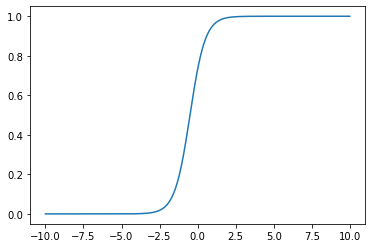

In [10]:
b0 = 1
b1 = 2

x = np.linspace(-10, 10, 1000)

y_lin = hip_lin(x, b0, b1)

y_sig = sig(y_lin)

plt.plot(x, y_sig)

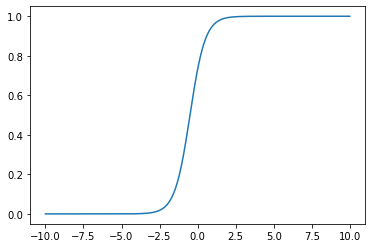

In [11]:
b0 = 1
b1 = 2

x = np.linspace(-10, 10, 1000)

# composição de funções! 
y = sig(hip_lin(x, b0, b1))

plt.plot(x, y)

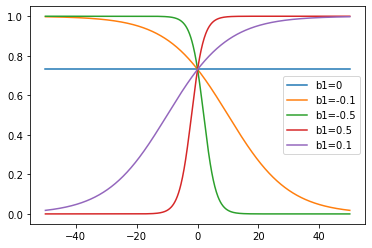

In [12]:
x = np.linspace(-50, 50, 1000)

b0 = 1
b1_list = [0, -0.1, -0.5, 0.5, 0.1]

for b1 in b1_list:

    # composição de funções! 
    y = sig(hip_lin(x, b0, b1))

    plt.plot(x, y, label=f"b1={b1}")
    
plt.legend()
plt.show()

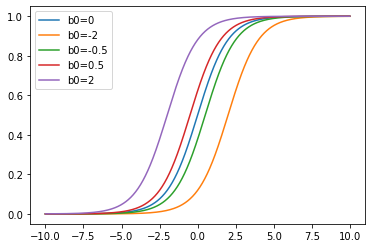

In [13]:
x = np.linspace(-10, 10, 1000)

b1 = 1
b0_list = [0, -2, -0.5, 0.5, 2]

for b0 in b0_list:

    # composição de funções! 
    y = sig(hip_lin(x, b0, b1))

    plt.plot(x, y, label=f"b0={b0}")
    
plt.legend()
plt.show()

Com a biblioteca [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/) podemos fazer plots interativos super legais!

Valeu Marcelo e Alexandre pela ótima dica!!

In [14]:
import ipywidgets as widgets

def reg_lod_widget(b1=1, b0=1):
    
    # composição de funções! 
    y = sig(hip_lin(x, b0, b1))

    plt.plot(x, y, label=f"$b_0$={b0} | $b_1$={b1}")
    
    plt.legend()
    
    plt.ylim(-0.25, 1.25)

In [15]:
widgets.interact(reg_lod_widget, b0=(-2, 2, 0.1), b1=(-2, 2, 0.1));

interactive(children=(FloatSlider(value=1.0, description='b1', max=2.0, min=-2.0), FloatSlider(value=1.0, desc…

___

### Função de perda e algoritmo de aprendizagem

A função de perda para a regressão logística é a famosa [binary cross-entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a), também conhecida como [log loss](https://developers.google.com/machine-learning/crash-course/logistic-regression/model-training)

Esta função será de enorme importância no estudo de **redes neurais**.

As principais implementações do algoritmo de aprendizagem da regressão logística se baseia no [método de máxima verossimilhança](https://pt.wikipedia.org/wiki/M%C3%A1xima_verossimilhan%C3%A7a). 

Para maiores detalhes sobre o algoritmo de aprendizagem, veja [este vídeo](https://youtu.be/yIYKR4sgzI8) e [esta série de vídeos](https://youtu.be/vN5cNN2-HWE), do ótimo canal StatQuest!


_________

Vamos analisar um pouco mais nosso dataset de marketing...

In [16]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.950,35,61833.900,256.090,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.230,31,68441.850,193.770,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.470,26,59785.940,236.500,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.150,29,54806.180,245.890,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.370,35,73889.990,225.580,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.970,30,71384.570,208.580,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.300,45,67782.170,134.420,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.630,51,42415.720,120.370,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.550,19,41920.790,187.950,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


Aqui novamente, vamos considerar apenas as colunas numéricas como features. 

Sigamos com o train-test split!

In [17]:
df_model = df.select_dtypes(include=np.number)

In [18]:
X = df_model.drop(columns="Clicked on Ad")
y = df_model["Clicked on Ad"]

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

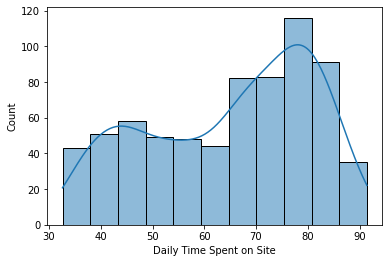

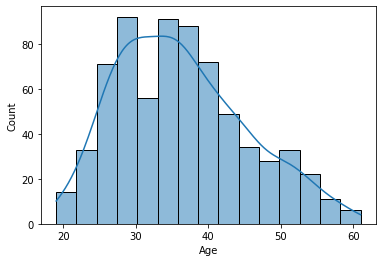

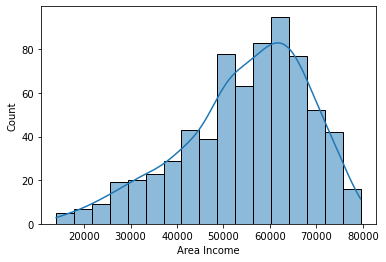

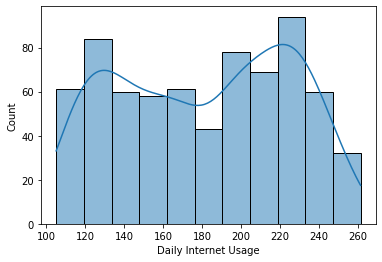

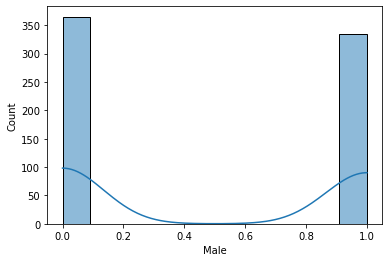

In [20]:
for col in X_train:
    
    sns.histplot(data=X_train, x=col, kde=True)
    
    plt.show()

Quando fizermos a EDA de um problema de classificação, é muito útil utilizar o target para analisar a **separabilidade** das classes! 

Para este fim, basta usarmos o argumento `hue` das funções do seaborn!

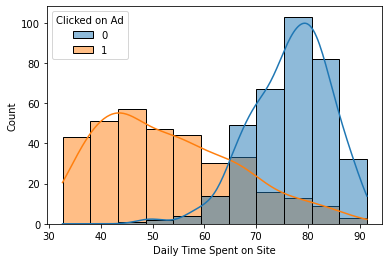

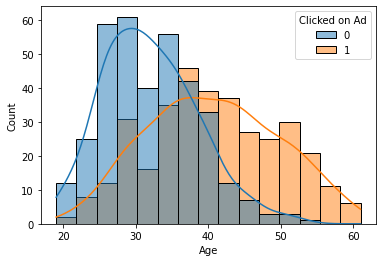

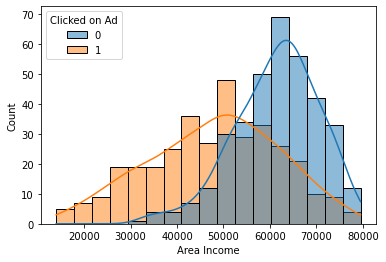

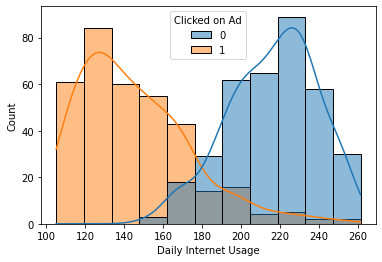

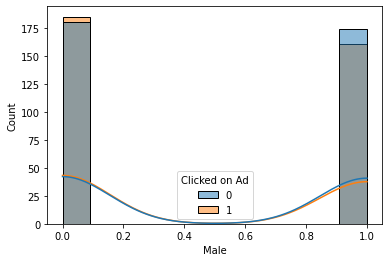

In [21]:
for col in X_train:
    
    sns.histplot(data=X_train, x=col, kde=True, hue=y_train)
    
    plt.show()

O `pairplot` é uma ferramente legal para visualizarmos nossos dados projetados ao subspaço de cada par de features:

In [22]:
pd.concat([X_train, y_train], axis=1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
541,75.650,39,64021.550,247.900,1,0
440,46.040,32,65499.930,147.920,0,1
482,69.420,25,65791.170,213.380,0,0
422,53.380,35,60803.370,120.060,1,1
778,52.670,44,14775.500,191.260,0,1
...,...,...,...,...,...,...
106,72.230,25,46557.920,241.030,1,0
270,44.490,53,63100.130,168.000,1,1
860,91.370,45,51920.490,182.650,1,1
435,56.660,42,72684.440,139.420,0,1


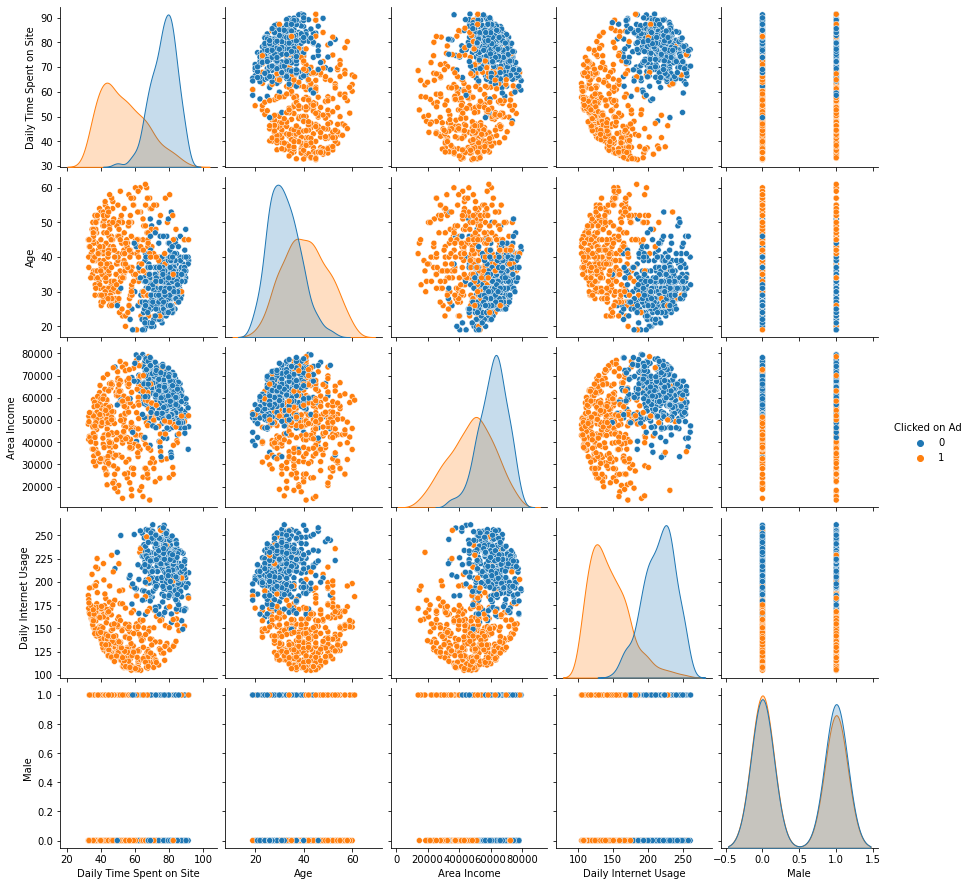

In [23]:
sns.pairplot(data=pd.concat([X_train, y_train], axis=1), hue="Clicked on Ad")

Como tínhamos comentado no início, nossos dados são muito bem separáveis!

Isto favorece bastante a performance do nosso modelo. Mas, lembre-se, é bem raro encontrar casos assim na vida real! (É aí que devemos partir para métodos mais avançados, como SVM, árvores, etc.)

Vamos começar a construir o modelo?

In [24]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression().fit(X_train, y_train)

__Modelo treinado!__

$$f_{H, \vec{b}}(\vec{x}) = P(y=1 | \vec{x}) = \frac{1}{1 + e^{-(b_0 + b_1 x_1 + \cdots + b_p x_p)}}$$

Vamos ver os parâmetros do modelo:

In [25]:
logit.intercept_

array([0.005])

In [26]:
logit.feature_names_in_

array(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male'], dtype=object)

In [27]:
logit.coef_

array([[-0.056,  0.266, -0.   , -0.027,  0.002]])

In [28]:
logit.coef_[0][2]

-1.6215339621629532e-05

Lembre-se que, diferentemente da regressão linear, devido ao fato da função logística ser uma exponencial, a variação de $P(x)$ depende de x, e não apenas dos coeficientes! Então, a interpretação dos coeficientes não é tão imediata. 

Mas, os sinais carregam significado. Para um coeficiente:
- positivo ($b_i > 0$), temos que um aumento em x levará a um aumento de $P(x)$;
- negativo ($b_i < 0$), temos que um aumento em x levará a uma diminuição de $P(x)$

Mas, a variacão de $P(x)$ em si, depende do valor de x!

__Agora que o modelo está treinado, vamos avaliá-lo!__

______
_____
_____
____

In [29]:
X_test

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
521,63.260,29,54787.370,120.460,1
737,71.230,52,41521.280,122.590,0
740,43.630,38,61757.120,135.250,1
660,42.040,49,67323.000,182.110,0
411,78.680,29,66225.720,208.050,0
...,...,...,...,...,...
468,65.590,47,28265.810,121.810,0
935,83.980,36,68305.910,194.620,0
428,60.530,29,56759.480,123.280,0
7,66.000,48,24593.330,131.760,1


In [30]:
y_test.values

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0], d

In [31]:
logit.predict(X_test)

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0], d

Além dos coeficientes do modelo, algo muito interessante que a classe do sklearn proporciona é o método `predict_proba()`

Esse método retorna exatamente qual é a **probabilidade modelada pelo logit**, isto é, $P(y=1 | \vec{x})$.

Isso pode ser muito útil, pois assim conseguimos **mudar qual é o cutoff de escolha de classe** para ser algo diferente de 0.5!


In [32]:
logit.classes_

array([0, 1], dtype=int64)

In [33]:
proba_1 = logit.predict_proba(X_test)[:, 1]

proba_1

array([0.494, 0.997, 0.95 , 0.99 , 0.03 , 0.285, 0.023, 0.991, 0.309,
       0.948, 0.019, 0.909, 0.997, 0.024, 0.918, 0.994, 0.999, 0.968,
       0.093, 0.99 , 0.093, 0.987, 0.994, 0.015, 0.02 , 0.995, 0.009,
       0.015, 0.991, 0.731, 0.017, 0.669, 0.036, 0.857, 0.998, 0.071,
       0.025, 0.111, 0.865, 0.98 , 0.014, 0.919, 0.024, 0.984, 0.012,
       0.101, 0.992, 0.998, 0.024, 0.997, 0.981, 0.008, 0.884, 0.012,
       0.112, 0.067, 0.136, 0.998, 0.025, 0.961, 0.077, 0.991, 0.109,
       0.972, 0.878, 0.974, 0.999, 0.064, 0.705, 0.951, 0.973, 0.501,
       0.128, 0.051, 0.841, 0.064, 0.035, 0.965, 0.491, 0.065, 0.99 ,
       0.966, 0.577, 0.552, 0.075, 0.04 , 0.02 , 0.006, 0.084, 0.039,
       0.088, 0.218, 0.068, 0.903, 0.222, 0.032, 0.999, 0.893, 0.098,
       0.029, 0.917, 0.009, 0.992, 0.033, 0.996, 0.507, 0.867, 0.398,
       0.986, 0.045, 0.998, 0.057, 0.959, 0.996, 0.188, 0.522, 0.024,
       0.147, 0.043, 0.46 , 0.902, 0.968, 0.999, 0.025, 0.23 , 0.027,
       0.529, 0.029,

In [34]:
cutoff = 0.1

np.where(proba_1 >= cutoff, 1, 0)

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [35]:
cutoff = 0.9

np.where(proba_1 >= cutoff, 1, 0)

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

## 3) Métricas de performance para problemas de classificação

Após treinar o modelo, como podemos avaliar sua performance?

No caso de problemas de classificação, existem **métricas específicas**, e também um importante conceito chamado de **Matriz de Confusão**.

A **matriz de confusão** leva em consideração as **classes preditas** e as **classes verdadeiras** da base de **teste**, e contabiliza a performance do modelo:

<img src=https://diegonogare.net/wp-content/uploads/2020/04/matrizConfusao-600x381.png height="400" width="400">

Note que a diagonal principal são as observações que o modelo acertou! Temos:

- Verdadeiros Positivos (VP): classificação correta da classe positivo;
- Verdadeiros Negativos (VN): classificação correta da classe negativo;
- Falsos Positivos (FP, erro tipo I): correto: negativo. Previsto: positivo.
- Falsos Negativos (FN, erro tipo II): correto: positivo. Previsto: negativo.

Um jeito fácil de lembrar os tipos de erros:

<img src="https://i.pinimg.com/originals/f6/9b/11/f69b111014ef466fe541a393346d2c3a.jpg" height="400" width="400">

> **IMPORTANTE**: dependendo da implementação/referência, a ordem das linhas/colunas pode mudar, então se atente a isso quando for interpretar a matriz de confusão!

No Sklearn, a convenção é a seguinte:

<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg" width=400>

Além disso, temos as seguintes métricas numéricas de avaliação:

- Acurácia (Accuracy): porcentagem de classificações CORRETAS do modelo;

- Precisão (Precision): das respostas retornadas, quantas são relevantes? -- é a razão entre verdadeiros positivos e o  número de **preditos positivos**, isto é, positivos quanto à **label predita pelo modelo**.

- Revocação/Sensibilidade (Recall/Sensitivity): das respostas relevantes, quantas são retornadas? -- é a razão entre verdadeiros positivos e o  número de **verdadeiramente positivos**, isto é, positivos quanto à **label real**.

- F1-Score: média harmônica de precision e recall.

Descrição da imagem: 

> tudo o que tá no lado esquerdo é a classe real positiva (y = 1); do lado direito, real negativa (y = 0);

> tudo o que tá dentro do circulo predita positiva ($\hat{y} = 1$); fora do circulo, predita negativa ($\hat{y} =0$)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/1200px-Precisionrecall.svg.png" width=400>

Devido ao <a href="https://medium.com/opex-analytics/why-you-need-to-understand-the-trade-off-between-precision-and-recall-525a33919942">tradeoff entre precision e recall</a>, uma métrica que em muitos casos é interessante de ser otimizada é o F1! 

<img src="https://miro.medium.com/max/1080/1*t1vf-ofJrJqtmam0KSn3EQ.png" width=500>

Adiante, veremos como calcular a matriz de confusão e as métricas acima para problemas de classificação!

_______

Um ponto muito importante é que o método `predict()` se utiliza do cutoff igual a 0.5 para tomar a decisão! Veremos mais detalhes sobre isso mais a frente. Por enquanto, vamos seguir com a avaliação do modelo com este cutoff padrão!

In [36]:
# y_pred = logit.predict(X_test)

proba_1 = logit.predict_proba(X_test)[:, 1]
cutoff = 0.5
y_pred = np.where(proba_1 >= cutoff, 1, 0)

y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0])

Como vimos no passo 2, em problemas de classificação é muito comum utilizarmos a **matriz de confusão** e as **métricas de classificação** para avaliar nossos modelos.

Dado isso, o sklearn já disponibilica estas funcionalidades! Vejamos algumas delas!

In [37]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[140   6]
 [ 25 129]]


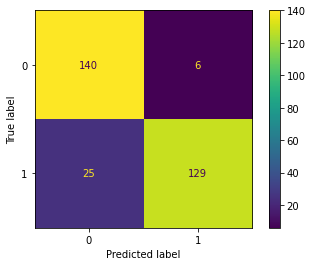

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

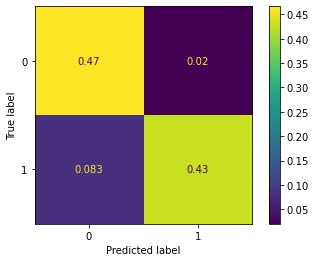

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="all")

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [41]:
cr_dict = classification_report(y_test, y_pred, output_dict=True)

In [42]:
cr_dict

{'0': {'precision': 0.8484848484848485,
  'recall': 0.958904109589041,
  'f1-score': 0.9003215434083601,
  'support': 146},
 '1': {'precision': 0.9555555555555556,
  'recall': 0.8376623376623377,
  'f1-score': 0.8927335640138409,
  'support': 154},
 'accuracy': 0.8966666666666666,
 'macro avg': {'precision': 0.902020202020202,
  'recall': 0.8982832236256894,
  'f1-score': 0.8965275537111005,
  'support': 300},
 'weighted avg': {'precision': 0.9034478114478115,
  'recall': 0.8966666666666666,
  'f1-score': 0.8964263806525069,
  'support': 300}}

In [43]:
cr_dict["1"]

{'precision': 0.9555555555555556,
 'recall': 0.8376623376623377,
 'f1-score': 0.8927335640138409,
 'support': 154}

In [44]:
cr_dict["1"]["precision"]

0.9555555555555556

In [45]:
cr_dict["weighted avg"]

{'precision': 0.9034478114478115,
 'recall': 0.8966666666666666,
 'f1-score': 0.8964263806525069,
 'support': 300}

Conforme esperado, nosso modelo está muito bom! Um f1-score tão alto na vida real é algo notável!

Isso se deve à grande separabilidade dos nossos dados!

In [46]:
def clf_metrics(modelo, X, y, cutoff=0.5, label_metrica="", print_plot=True):
    
    proba_1 = logit.predict_proba(X)[:, 1]
    y_pred = np.where(proba_1 >= cutoff, 1, 0)
    
    if print_plot:
        
        print(f"Métricas de avaliação de {label_metrica}")
    
        ConfusionMatrixDisplay.from_predictions(y, y_pred)
        plt.show()
    
        print(classification_report(y, y_pred))
    
    return classification_report(y, y_pred, output_dict=True)

Métricas de avaliação de treino


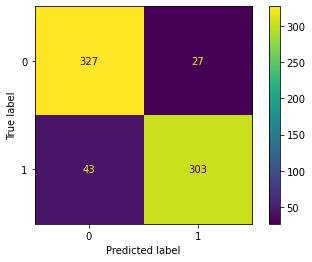

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       354
           1       0.92      0.88      0.90       346

    accuracy                           0.90       700
   macro avg       0.90      0.90      0.90       700
weighted avg       0.90      0.90      0.90       700



In [47]:
cr_train = clf_metrics(logit, X_train, y_train, label_metrica="treino", cutoff=0.5)

In [48]:
y_test.shape

(300,)

Métricas de avaliação de teste


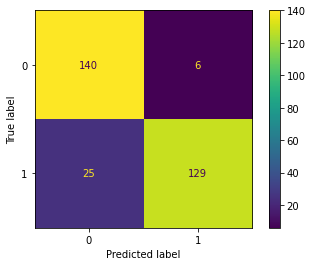

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [49]:
cr_test = clf_metrics(logit, X_test, y_test, label_metrica="teste", cutoff=0.5)

In [50]:
cr_test

{'0': {'precision': 0.8484848484848485,
  'recall': 0.958904109589041,
  'f1-score': 0.9003215434083601,
  'support': 146},
 '1': {'precision': 0.9555555555555556,
  'recall': 0.8376623376623377,
  'f1-score': 0.8927335640138409,
  'support': 154},
 'accuracy': 0.8966666666666666,
 'macro avg': {'precision': 0.902020202020202,
  'recall': 0.8982832236256894,
  'f1-score': 0.8965275537111005,
  'support': 300},
 'weighted avg': {'precision': 0.9034478114478115,
  'recall': 0.8966666666666666,
  'f1-score': 0.8964263806525069,
  'support': 300}}

_________________

Vamos avaliar diferentes cutoffs...

In [51]:
logit

LogisticRegression()

Pra entender o código abaixo

In [52]:
df_test = pd.DataFrame(cr_test)

df_test

,0,1,accuracy,macro avg,weighted avg
precision,0.848,0.956,0.897,0.902,0.903
recall,0.959,0.838,0.897,0.898,0.897
f1-score,0.900,0.893,0.897,0.897,0.896
support,146.000,154.000,0.897,300.000,300.000


In [53]:
df_train = pd.DataFrame(cr_train)

df_train

,0,1,accuracy,macro avg,weighted avg
precision,0.884,0.918,0.900,0.901,0.901
recall,0.924,0.876,0.900,0.900,0.900
f1-score,0.903,0.896,0.900,0.900,0.900
support,354.000,346.000,0.900,700.000,700.000


In [54]:
results_train = {"cutoff" : []}

# o [:-1] é pra não trazer o "support" (se quiser trazer, é só tirar isso)
for idx in df_train.index[:-1]:
    
    for col in df_train:
        
        results_train[f"{idx}_{col}"] = []
        
results_train

{'cutoff': [],
 'precision_0': [],
 'precision_1': [],
 'precision_accuracy': [],
 'precision_macro avg': [],
 'precision_weighted avg': [],
 'recall_0': [],
 'recall_1': [],
 'recall_accuracy': [],
 'recall_macro avg': [],
 'recall_weighted avg': [],
 'f1-score_0': [],
 'f1-score_1': [],
 'f1-score_accuracy': [],
 'f1-score_macro avg': [],
 'f1-score_weighted avg': []}

In [55]:
results_test = {"cutoff" : []}

for idx in df_test.index[:-1]:
    
    for col in df_test:
        
        results_test[f"{idx}_{col}"] = []
        
results_test

{'cutoff': [],
 'precision_0': [],
 'precision_1': [],
 'precision_accuracy': [],
 'precision_macro avg': [],
 'precision_weighted avg': [],
 'recall_0': [],
 'recall_1': [],
 'recall_accuracy': [],
 'recall_macro avg': [],
 'recall_weighted avg': [],
 'f1-score_0': [],
 'f1-score_1': [],
 'f1-score_accuracy': [],
 'f1-score_macro avg': [],
 'f1-score_weighted avg': []}


################################################################################
                         Modelo logit com cutoff = 0.1                          
################################################################################

Métricas de avaliação de teste


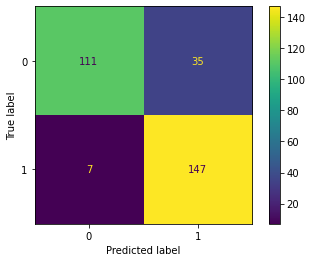

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       146
           1       0.81      0.95      0.88       154

    accuracy                           0.86       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.87      0.86      0.86       300


################################################################################
                 Modelo logit com cutoff = 0.15000000000000002                  
################################################################################

Métricas de avaliação de teste


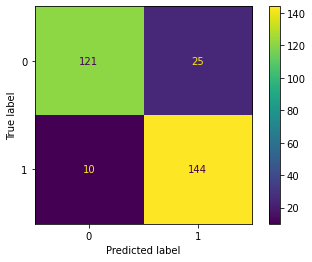

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       146
           1       0.85      0.94      0.89       154

    accuracy                           0.88       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300


################################################################################
                 Modelo logit com cutoff = 0.20000000000000004                  
################################################################################

Métricas de avaliação de teste


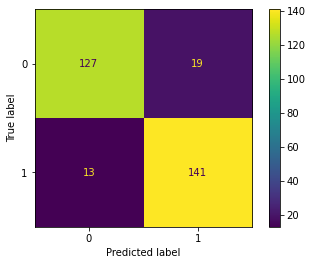

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       146
           1       0.88      0.92      0.90       154

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300


################################################################################
                 Modelo logit com cutoff = 0.25000000000000006                  
################################################################################

Métricas de avaliação de teste


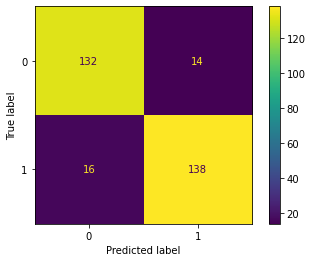

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       146
           1       0.91      0.90      0.90       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300


################################################################################
                 Modelo logit com cutoff = 0.30000000000000004                  
################################################################################

Métricas de avaliação de teste


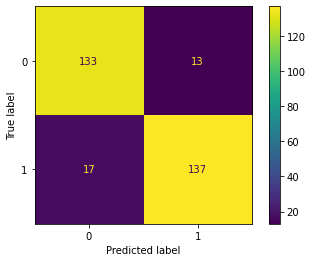

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       146
           1       0.91      0.89      0.90       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300


################################################################################
                  Modelo logit com cutoff = 0.3500000000000001                  
################################################################################

Métricas de avaliação de teste


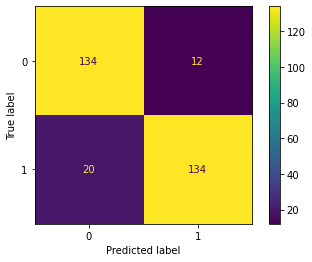

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       146
           1       0.92      0.87      0.89       154

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300


################################################################################
                 Modelo logit com cutoff = 0.40000000000000013                  
################################################################################

Métricas de avaliação de teste


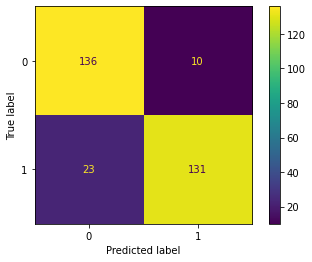

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       146
           1       0.93      0.85      0.89       154

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300


################################################################################
                 Modelo logit com cutoff = 0.45000000000000007                  
################################################################################

Métricas de avaliação de teste


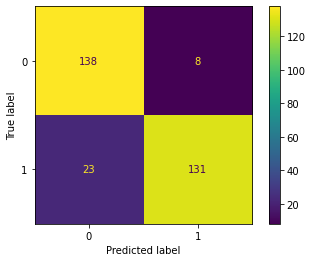

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       146
           1       0.94      0.85      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300


################################################################################
                  Modelo logit com cutoff = 0.5000000000000001                  
################################################################################

Métricas de avaliação de teste


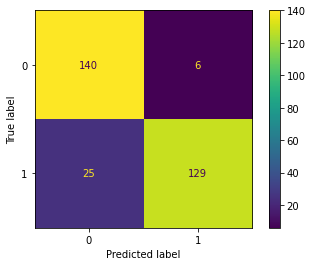

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300


################################################################################
                  Modelo logit com cutoff = 0.5500000000000002                  
################################################################################

Métricas de avaliação de teste


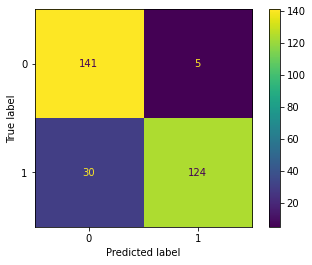

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       146
           1       0.96      0.81      0.88       154

    accuracy                           0.88       300
   macro avg       0.89      0.89      0.88       300
weighted avg       0.89      0.88      0.88       300


################################################################################
                  Modelo logit com cutoff = 0.6000000000000002                  
################################################################################

Métricas de avaliação de teste


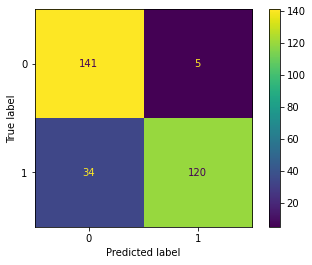

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       146
           1       0.96      0.78      0.86       154

    accuracy                           0.87       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.88      0.87      0.87       300


################################################################################
                  Modelo logit com cutoff = 0.6500000000000001                  
################################################################################

Métricas de avaliação de teste


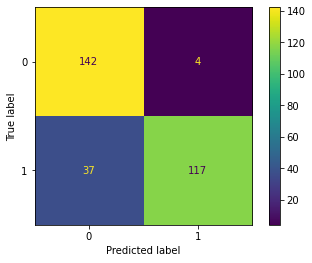

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       146
           1       0.97      0.76      0.85       154

    accuracy                           0.86       300
   macro avg       0.88      0.87      0.86       300
weighted avg       0.88      0.86      0.86       300


################################################################################
                  Modelo logit com cutoff = 0.7000000000000002                  
################################################################################

Métricas de avaliação de teste


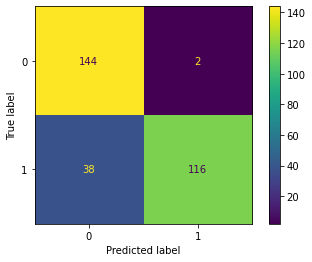

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       146
           1       0.98      0.75      0.85       154

    accuracy                           0.87       300
   macro avg       0.89      0.87      0.87       300
weighted avg       0.89      0.87      0.87       300


################################################################################
                  Modelo logit com cutoff = 0.7500000000000002                  
################################################################################

Métricas de avaliação de teste


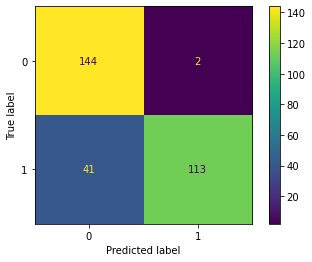

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       146
           1       0.98      0.73      0.84       154

    accuracy                           0.86       300
   macro avg       0.88      0.86      0.86       300
weighted avg       0.88      0.86      0.85       300


################################################################################
                  Modelo logit com cutoff = 0.8000000000000002                  
################################################################################

Métricas de avaliação de teste


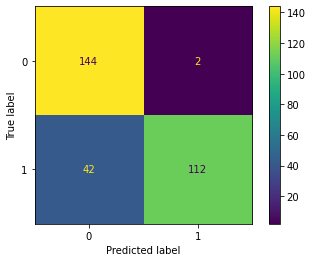

              precision    recall  f1-score   support

           0       0.77      0.99      0.87       146
           1       0.98      0.73      0.84       154

    accuracy                           0.85       300
   macro avg       0.88      0.86      0.85       300
weighted avg       0.88      0.85      0.85       300


################################################################################
                  Modelo logit com cutoff = 0.8500000000000002                  
################################################################################

Métricas de avaliação de teste


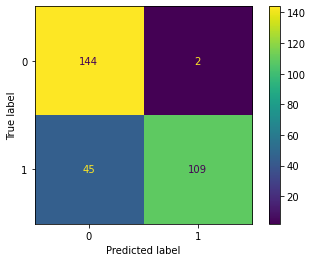

              precision    recall  f1-score   support

           0       0.76      0.99      0.86       146
           1       0.98      0.71      0.82       154

    accuracy                           0.84       300
   macro avg       0.87      0.85      0.84       300
weighted avg       0.87      0.84      0.84       300


################################################################################
                  Modelo logit com cutoff = 0.9000000000000002                  
################################################################################

Métricas de avaliação de teste


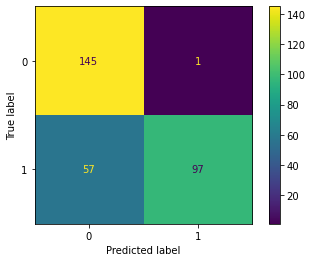

              precision    recall  f1-score   support

           0       0.72      0.99      0.83       146
           1       0.99      0.63      0.77       154

    accuracy                           0.81       300
   macro avg       0.85      0.81      0.80       300
weighted avg       0.86      0.81      0.80       300


################################################################################
                  Modelo logit com cutoff = 0.9500000000000003                  
################################################################################

Métricas de avaliação de teste


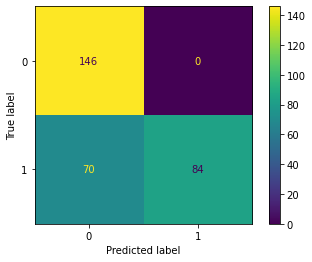

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       146
           1       1.00      0.55      0.71       154

    accuracy                           0.77       300
   macro avg       0.84      0.77      0.76       300
weighted avg       0.84      0.77      0.75       300



In [56]:
cutoff_list = np.arange(0.1, 1, 0.05)

for cutoff in cutoff_list:
    
    print()
    print("#"*80)
    print(f"Modelo logit com cutoff = {cutoff}".center(80))
    print("#"*80)
    print()
    
    # ============================================
    
    cr_train = clf_metrics(logit, X_train, y_train, label_metrica="treino", cutoff=cutoff, print_plot=False)
    df_cr_train = pd.DataFrame(cr_train)

    results_train["cutoff"].append(cutoff)

    for idx in df_cr_train.index[:-1]:

        for col in df_cr_train:

            results_train[f"{idx}_{col}"].append(df_cr_train.loc[idx, col])
            
    # ============================================
    
    cr_test = clf_metrics(logit, X_test, y_test, label_metrica="teste", cutoff=cutoff)
    df_cr_test = pd.DataFrame(cr_test)
    
    results_test["cutoff"].append(cutoff)
    
    for idx in df_cr_test.index[:-1]:

        for col in df_cr_test:

            results_test[f"{idx}_{col}"].append(df_cr_test.loc[idx, col])
    
    # ============================================

In [57]:
df_results_train = pd.DataFrame(results_train)

df_results_train.sort_values("precision_1", ascending=False)

,cutoff,precision_0,precision_1,precision_accuracy,precision_macro avg,precision_weighted avg,recall_0,recall_1,recall_accuracy,recall_macro avg,recall_weighted avg,f1-score_0,f1-score_1,f1-score_accuracy,f1-score_macro avg,f1-score_weighted avg
17,0.950,0.684,0.995,0.766,0.839,0.838,0.997,0.529,0.766,0.763,0.766,0.811,0.691,0.766,0.751,0.752
16,0.900,0.749,0.991,0.829,0.870,0.869,0.994,0.659,0.829,0.827,0.829,0.854,0.792,0.829,0.823,0.823
15,0.850,0.780,0.988,0.854,0.884,0.883,0.992,0.714,0.854,0.853,0.854,0.873,0.829,0.854,0.851,0.851
14,0.800,0.796,0.973,0.863,0.885,0.884,0.980,0.743,0.863,0.862,0.863,0.878,0.843,0.863,0.861,0.861
13,0.750,0.814,0.967,0.874,0.891,0.890,0.975,0.772,0.874,0.873,0.874,0.887,0.859,0.874,0.873,0.873
11,0.650,0.840,0.959,0.890,0.900,0.899,0.966,0.812,0.890,0.889,0.890,0.899,0.879,0.890,0.889,0.889
12,0.700,0.824,0.958,0.879,0.891,0.890,0.966,0.789,0.879,0.878,0.879,0.889,0.865,0.879,0.877,0.878
10,0.600,0.859,0.954,0.900,0.906,0.906,0.960,0.838,0.900,0.899,0.900,0.907,0.892,0.900,0.899,0.900
9,0.550,0.872,0.940,0.903,0.906,0.906,0.946,0.858,0.903,0.902,0.903,0.908,0.897,0.903,0.903,0.903
7,0.450,0.896,0.919,0.907,0.908,0.908,0.924,0.890,0.907,0.907,0.907,0.910,0.905,0.907,0.907,0.907


In [58]:
df_results_test = pd.DataFrame(results_test)

df_results_test.sort_values("precision_1", ascending=False)

,cutoff,precision_0,precision_1,precision_accuracy,precision_macro avg,precision_weighted avg,recall_0,recall_1,recall_accuracy,recall_macro avg,recall_weighted avg,f1-score_0,f1-score_1,f1-score_accuracy,f1-score_macro avg,f1-score_weighted avg
17,0.950,0.676,1.000,0.767,0.838,0.842,1.000,0.545,0.767,0.773,0.767,0.807,0.706,0.767,0.756,0.755
16,0.900,0.718,0.990,0.807,0.854,0.857,0.993,0.630,0.807,0.812,0.807,0.833,0.770,0.807,0.802,0.801
12,0.700,0.791,0.983,0.867,0.887,0.890,0.986,0.753,0.867,0.870,0.867,0.878,0.853,0.867,0.865,0.865
13,0.750,0.778,0.983,0.857,0.880,0.883,0.986,0.734,0.857,0.860,0.857,0.870,0.840,0.857,0.855,0.855
14,0.800,0.774,0.982,0.853,0.878,0.881,0.986,0.727,0.853,0.857,0.853,0.867,0.836,0.853,0.852,0.851
15,0.850,0.762,0.982,0.843,0.872,0.875,0.986,0.708,0.843,0.847,0.843,0.860,0.823,0.843,0.841,0.841
11,0.650,0.793,0.967,0.863,0.880,0.882,0.973,0.760,0.863,0.866,0.863,0.874,0.851,0.863,0.862,0.862
9,0.550,0.825,0.961,0.883,0.893,0.895,0.966,0.805,0.883,0.885,0.883,0.890,0.876,0.883,0.883,0.883
10,0.600,0.806,0.960,0.870,0.883,0.885,0.966,0.779,0.870,0.872,0.870,0.879,0.860,0.870,0.869,0.869
8,0.500,0.848,0.956,0.897,0.902,0.903,0.959,0.838,0.897,0.898,0.897,0.900,0.893,0.897,0.897,0.896


Alternativamente, podemos fazer como abaixo (adaptado da sugestão do Marcelo, créditos a ele!)


################################################################################
                         Modelo logit com cutoff = 0.1                          
################################################################################

Métricas de avaliação de teste


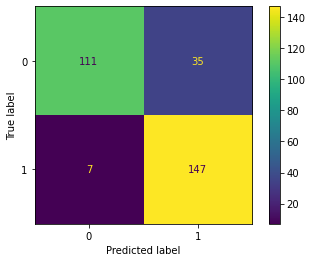

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       146
           1       0.81      0.95      0.88       154

    accuracy                           0.86       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.87      0.86      0.86       300


################################################################################
                 Modelo logit com cutoff = 0.15000000000000002                  
################################################################################

Métricas de avaliação de teste


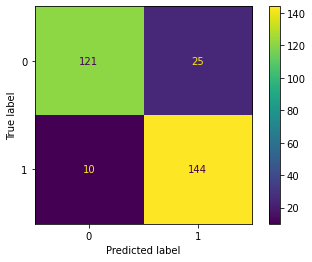

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       146
           1       0.85      0.94      0.89       154

    accuracy                           0.88       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300


################################################################################
                 Modelo logit com cutoff = 0.20000000000000004                  
################################################################################

Métricas de avaliação de teste


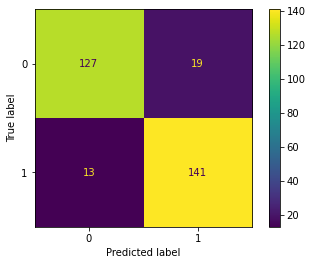

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       146
           1       0.88      0.92      0.90       154

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300


################################################################################
                 Modelo logit com cutoff = 0.25000000000000006                  
################################################################################

Métricas de avaliação de teste


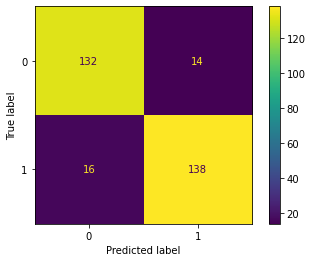

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       146
           1       0.91      0.90      0.90       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300


################################################################################
                 Modelo logit com cutoff = 0.30000000000000004                  
################################################################################

Métricas de avaliação de teste


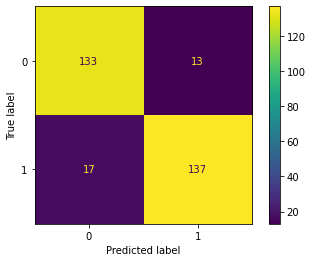

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       146
           1       0.91      0.89      0.90       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300


################################################################################
                  Modelo logit com cutoff = 0.3500000000000001                  
################################################################################

Métricas de avaliação de teste


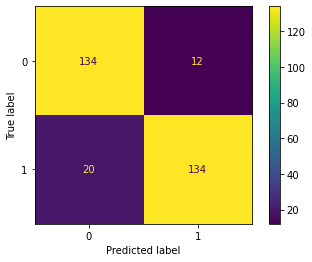

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       146
           1       0.92      0.87      0.89       154

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300


################################################################################
                 Modelo logit com cutoff = 0.40000000000000013                  
################################################################################

Métricas de avaliação de teste


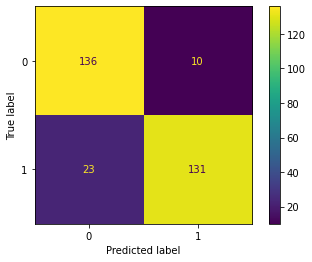

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       146
           1       0.93      0.85      0.89       154

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300


################################################################################
                 Modelo logit com cutoff = 0.45000000000000007                  
################################################################################

Métricas de avaliação de teste


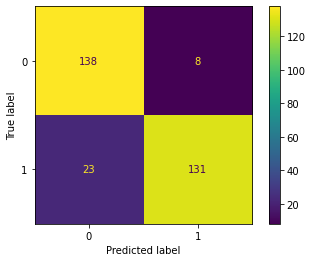

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       146
           1       0.94      0.85      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300


################################################################################
                  Modelo logit com cutoff = 0.5000000000000001                  
################################################################################

Métricas de avaliação de teste


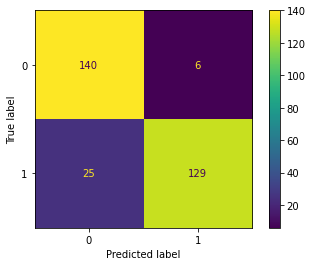

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300


################################################################################
                  Modelo logit com cutoff = 0.5500000000000002                  
################################################################################

Métricas de avaliação de teste


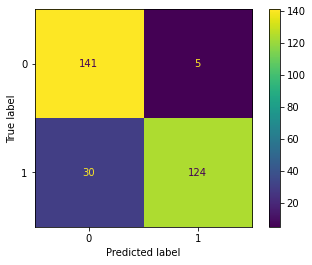

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       146
           1       0.96      0.81      0.88       154

    accuracy                           0.88       300
   macro avg       0.89      0.89      0.88       300
weighted avg       0.89      0.88      0.88       300


################################################################################
                  Modelo logit com cutoff = 0.6000000000000002                  
################################################################################

Métricas de avaliação de teste


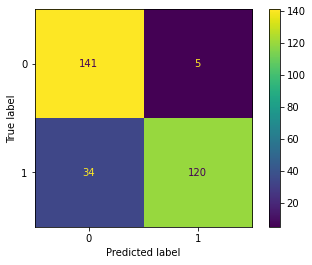

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       146
           1       0.96      0.78      0.86       154

    accuracy                           0.87       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.88      0.87      0.87       300


################################################################################
                  Modelo logit com cutoff = 0.6500000000000001                  
################################################################################

Métricas de avaliação de teste


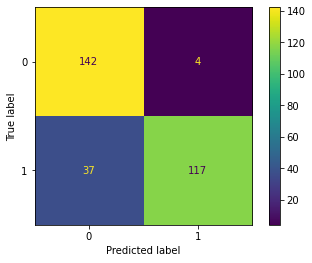

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       146
           1       0.97      0.76      0.85       154

    accuracy                           0.86       300
   macro avg       0.88      0.87      0.86       300
weighted avg       0.88      0.86      0.86       300


################################################################################
                  Modelo logit com cutoff = 0.7000000000000002                  
################################################################################

Métricas de avaliação de teste


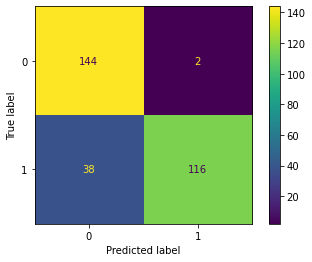

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       146
           1       0.98      0.75      0.85       154

    accuracy                           0.87       300
   macro avg       0.89      0.87      0.87       300
weighted avg       0.89      0.87      0.87       300


################################################################################
                  Modelo logit com cutoff = 0.7500000000000002                  
################################################################################

Métricas de avaliação de teste


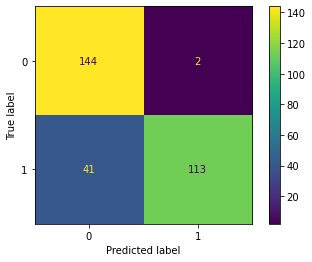

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       146
           1       0.98      0.73      0.84       154

    accuracy                           0.86       300
   macro avg       0.88      0.86      0.86       300
weighted avg       0.88      0.86      0.85       300


################################################################################
                  Modelo logit com cutoff = 0.8000000000000002                  
################################################################################

Métricas de avaliação de teste


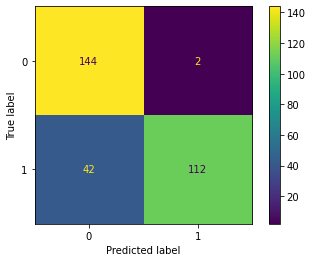

              precision    recall  f1-score   support

           0       0.77      0.99      0.87       146
           1       0.98      0.73      0.84       154

    accuracy                           0.85       300
   macro avg       0.88      0.86      0.85       300
weighted avg       0.88      0.85      0.85       300


################################################################################
                  Modelo logit com cutoff = 0.8500000000000002                  
################################################################################

Métricas de avaliação de teste


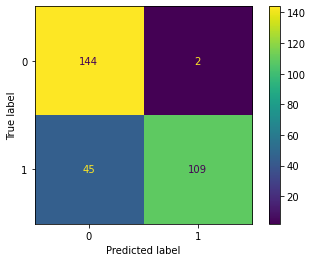

              precision    recall  f1-score   support

           0       0.76      0.99      0.86       146
           1       0.98      0.71      0.82       154

    accuracy                           0.84       300
   macro avg       0.87      0.85      0.84       300
weighted avg       0.87      0.84      0.84       300


################################################################################
                  Modelo logit com cutoff = 0.9000000000000002                  
################################################################################

Métricas de avaliação de teste


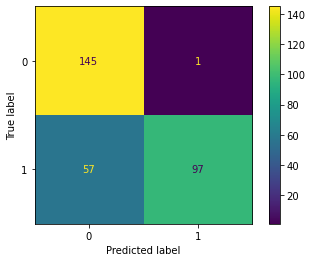

              precision    recall  f1-score   support

           0       0.72      0.99      0.83       146
           1       0.99      0.63      0.77       154

    accuracy                           0.81       300
   macro avg       0.85      0.81      0.80       300
weighted avg       0.86      0.81      0.80       300


################################################################################
                  Modelo logit com cutoff = 0.9500000000000003                  
################################################################################

Métricas de avaliação de teste


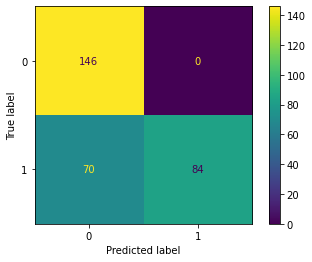

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       146
           1       1.00      0.55      0.71       154

    accuracy                           0.77       300
   macro avg       0.84      0.77      0.76       300
weighted avg       0.84      0.77      0.75       300



In [59]:
# começamos com dois dfs vazios, e vamos preenchendo abaixo
# (com os concats)
df_results_train = pd.DataFrame()
df_results_test = pd.DataFrame()

cutoff_list = np.arange(0.1, 1, 0.05)

for cutoff in cutoff_list:
    
    print()
    print("#"*80)
    print(f"Modelo logit com cutoff = {cutoff}".center(80))
    print("#"*80)
    print()
    
    # ============================================
    
    cr_train = clf_metrics(logit, X_train, y_train, label_metrica="treino", cutoff=cutoff, print_plot=False)
    df_cr_train = pd.DataFrame(cr_train)

    # o .iloc[:-1, :] é pra excluir o "support" (pode trazer tb caso queira)
    df_melt = df_cr_train.iloc[:-1, :].reset_index(drop=False).melt(id_vars='index', var_name="type")
    df_melt['cutoff'] = cutoff

    # corrigindo os dados de acurácia
    accuracy = df_melt.query("type == 'accuracy'").copy()
    accuracy["index"] = "accuracy"

    df_melt = df_melt.drop(index=accuracy.index)
    df_melt = pd.concat([df_melt, accuracy.iloc[[0], :]]).reset_index(drop=False)

    # pivotando
    df_pivot = df_melt.pivot(columns=['type', 'index'], values='value', index='cutoff')
    
    df_results_train = pd.concat([df_results_train, df_pivot])
            
    # ============================================
    
    cr_test = clf_metrics(logit, X_test, y_test, label_metrica="teste", cutoff=cutoff)
    df_cr_test = pd.DataFrame(cr_test)
    
    # o .iloc[:-1, :] é pra excluir o "support" (pode trazer tb caso queira)
    df_melt = df_cr_test.iloc[:-1, :].reset_index(drop=False).melt(id_vars='index', var_name="type")
    df_melt['cutoff'] = cutoff

    # corrigindo os dados de acurácia
    accuracy = df_melt.query("type == 'accuracy'").copy()
    accuracy["index"] = "accuracy"

    df_melt = df_melt.drop(index=accuracy.index)
    df_melt = pd.concat([df_melt, accuracy.iloc[[0], :]]).reset_index(drop=False)

    # pivotando
    df_pivot = df_melt.pivot(columns=['type', 'index'], values='value', index='cutoff')
    
    df_results_test = pd.concat([df_results_test, df_pivot])
    
    # ============================================

In [60]:
df_results_train

df_results_train.sort_values(('1', 'precision'), ascending=False)

type           0                         1                 macro avg         \
index  precision recall f1-score precision recall f1-score precision recall   
cutoff                                                                        
0.950      0.684  0.997    0.811     0.995  0.529    0.691     0.839  0.763   
0.900      0.749  0.994    0.854     0.991  0.659    0.792     0.870  0.827   
0.850      0.780  0.992    0.873     0.988  0.714    0.829     0.884  0.853   
0.800      0.796  0.980    0.878     0.973  0.743    0.843     0.885  0.862   
0.750      0.814  0.975    0.887     0.967  0.772    0.859     0.891  0.873   
0.650      0.840  0.966    0.899     0.959  0.812    0.879     0.900  0.889   
0.700      0.824  0.966    0.889     0.958  0.789    0.865     0.891  0.878   
0.600      0.859  0.960    0.907     0.954  0.838    0.892     0.906  0.899   
0.550      0.872  0.946    0.908     0.940  0.858    0.897     0.906  0.902   
0.450      0.896  0.924    0.910     0.919  0.890    0.905     0.908  0.907   
0.500      0.884  0.924    0.903     0.918  0.876    0.896     0.901  0.900   
0.400      0.912  0.907    0.909     0.905  0.910    0.908     0.909  0.909   
0.350      0.914  0.895    0.904     0.895  0.913    0.904     0.904  0.904   
0.300      0.917  0.873    0.894     0.876  0.919    0.897     0.896  0.896   
0.250      0.929  0.850    0.888     0.859  0.934    0.895     0.894  0.892   
0.200      0.930  0.822    0.873     0.837  0.936    0.884     0.883  0.879   
0.150      0.942  0.782    0.855     0.810  0.951    0.875     0.876  0.867   
0.100      0.949  0.686    0.797     0.750  0.962    0.843     0.850  0.824   

type            weighted avg                 accuracy  
index  f1-score    precision recall f1-score accuracy  
cutoff                                                 
0.950     0.751        0.838  0.766    0.752    0.766  
0.900     0.823        0.869  0.829    0.823    0.829  
0.850     0.851        0.883  0.854    0.851    0.854  
0.800     0.861        0.884  0.863    0.861    0.863  
0.750     0.873        0.890  0.874    0.873    0.874  
0.650     0.889        0.899  0.890    0.889    0.890  
0.700     0.877        0.890  0.879    0.878    0.879  
0.600     0.899        0.906  0.900    0.900    0.900  
0.550     0.903        0.906  0.903    0.903    0.903  
0.450     0.907        0.908  0.907    0.907    0.907  
0.500     0.900        0.901  0.900    0.900    0.900  
0.400     0.909        0.909  0.909    0.909    0.909  
0.350     0.904        0.904  0.904    0.904    0.904  
0.300     0.896        0.897  0.896    0.896    0.896  
0.250     0.891        0.894  0.891    0.891    0.891  
0.200     0.878        0.884  0.879    0.878    0.879  
0.150     0.865        0.877  0.866    0.865    0.866  
0.100     0.820        0.851  0.823    0.820    0.823

In [61]:
df_results_test

df_results_test.sort_values(('1', 'precision'), ascending=False)

type           0                         1                 macro avg         \
index  precision recall f1-score precision recall f1-score precision recall   
cutoff                                                                        
0.950      0.676  1.000    0.807     1.000  0.545    0.706     0.838  0.773   
0.900      0.718  0.993    0.833     0.990  0.630    0.770     0.854  0.812   
0.700      0.791  0.986    0.878     0.983  0.753    0.853     0.887  0.870   
0.750      0.778  0.986    0.870     0.983  0.734    0.840     0.880  0.860   
0.800      0.774  0.986    0.867     0.982  0.727    0.836     0.878  0.857   
0.850      0.762  0.986    0.860     0.982  0.708    0.823     0.872  0.847   
0.650      0.793  0.973    0.874     0.967  0.760    0.851     0.880  0.866   
0.550      0.825  0.966    0.890     0.961  0.805    0.876     0.893  0.885   
0.600      0.806  0.966    0.879     0.960  0.779    0.860     0.883  0.872   
0.500      0.848  0.959    0.900     0.956  0.838    0.893     0.902  0.898   
0.450      0.857  0.945    0.899     0.942  0.851    0.894     0.900  0.898   
0.400      0.855  0.932    0.892     0.929  0.851    0.888     0.892  0.891   
0.350      0.870  0.918    0.893     0.918  0.870    0.893     0.894  0.894   
0.300      0.887  0.911    0.899     0.913  0.890    0.901     0.900  0.900   
0.250      0.892  0.904    0.898     0.908  0.896    0.902     0.900  0.900   
0.200      0.907  0.870    0.888     0.881  0.916    0.898     0.894  0.893   
0.150      0.924  0.829    0.874     0.852  0.935    0.892     0.888  0.882   
0.100      0.941  0.760    0.841     0.808  0.955    0.875     0.874  0.857   

type            weighted avg                 accuracy  
index  f1-score    precision recall f1-score accuracy  
cutoff                                                 
0.950     0.756        0.842  0.767    0.755    0.767  
0.900     0.802        0.857  0.807    0.801    0.807  
0.700     0.865        0.890  0.867    0.865    0.867  
0.750     0.855        0.883  0.857    0.855    0.857  
0.800     0.852        0.881  0.853    0.851    0.853  
0.850     0.841        0.875  0.843    0.841    0.843  
0.650     0.862        0.882  0.863    0.862    0.863  
0.550     0.883        0.895  0.883    0.883    0.883  
0.600     0.869        0.885  0.870    0.869    0.870  
0.500     0.897        0.903  0.897    0.896    0.897  
0.450     0.897        0.901  0.897    0.897    0.897  
0.400     0.890        0.893  0.890    0.890    0.890  
0.350     0.893        0.895  0.893    0.893    0.893  
0.300     0.900        0.900  0.900    0.900    0.900  
0.250     0.900        0.900  0.900    0.900    0.900  
0.200     0.893        0.894  0.893    0.893    0.893  
0.150     0.883        0.887  0.883    0.883    0.883  
0.100     0.858        0.872  0.860    0.858    0.860

In [62]:
df_results_test

df_results_test.sort_values(('weighted avg', 'f1-score'), ascending=False)

type           0                         1                 macro avg         \
index  precision recall f1-score precision recall f1-score precision recall   
cutoff                                                                        
0.300      0.887  0.911    0.899     0.913  0.890    0.901     0.900  0.900   
0.250      0.892  0.904    0.898     0.908  0.896    0.902     0.900  0.900   
0.450      0.857  0.945    0.899     0.942  0.851    0.894     0.900  0.898   
0.500      0.848  0.959    0.900     0.956  0.838    0.893     0.902  0.898   
0.350      0.870  0.918    0.893     0.918  0.870    0.893     0.894  0.894   
0.200      0.907  0.870    0.888     0.881  0.916    0.898     0.894  0.893   
0.400      0.855  0.932    0.892     0.929  0.851    0.888     0.892  0.891   
0.150      0.924  0.829    0.874     0.852  0.935    0.892     0.888  0.882   
0.550      0.825  0.966    0.890     0.961  0.805    0.876     0.893  0.885   
0.600      0.806  0.966    0.879     0.960  0.779    0.860     0.883  0.872   
0.700      0.791  0.986    0.878     0.983  0.753    0.853     0.887  0.870   
0.650      0.793  0.973    0.874     0.967  0.760    0.851     0.880  0.866   
0.100      0.941  0.760    0.841     0.808  0.955    0.875     0.874  0.857   
0.750      0.778  0.986    0.870     0.983  0.734    0.840     0.880  0.860   
0.800      0.774  0.986    0.867     0.982  0.727    0.836     0.878  0.857   
0.850      0.762  0.986    0.860     0.982  0.708    0.823     0.872  0.847   
0.900      0.718  0.993    0.833     0.990  0.630    0.770     0.854  0.812   
0.950      0.676  1.000    0.807     1.000  0.545    0.706     0.838  0.773   

type            weighted avg                 accuracy  
index  f1-score    precision recall f1-score accuracy  
cutoff                                                 
0.300     0.900        0.900  0.900    0.900    0.900  
0.250     0.900        0.900  0.900    0.900    0.900  
0.450     0.897        0.901  0.897    0.897    0.897  
0.500     0.897        0.903  0.897    0.896    0.897  
0.350     0.893        0.895  0.893    0.893    0.893  
0.200     0.893        0.894  0.893    0.893    0.893  
0.400     0.890        0.893  0.890    0.890    0.890  
0.150     0.883        0.887  0.883    0.883    0.883  
0.550     0.883        0.895  0.883    0.883    0.883  
0.600     0.869        0.885  0.870    0.869    0.870  
0.700     0.865        0.890  0.867    0.865    0.867  
0.650     0.862        0.882  0.863    0.862    0.863  
0.100     0.858        0.872  0.860    0.858    0.860  
0.750     0.855        0.883  0.857    0.855    0.857  
0.800     0.852        0.881  0.853    0.851    0.853  
0.850     0.841        0.875  0.843    0.841    0.843  
0.900     0.802        0.857  0.807    0.801    0.807  
0.950     0.756        0.842  0.767    0.755    0.767

_________

### Tradeoff precision/recall

Conforme é possível ver acima, claramente há um **tradeoff** entre precision e recall conforme variamos o cutoff. Isso faz total sentido, dado que estas métricas representam!

Podemos visualizar este tradeoff facilmente com o sklearn:

In [63]:
y_proba_1 = logit.predict_proba(X_test)[:, 1]

In [64]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, cutoffs = precision_recall_curve(y_test, y_proba_1)

Para plotar:

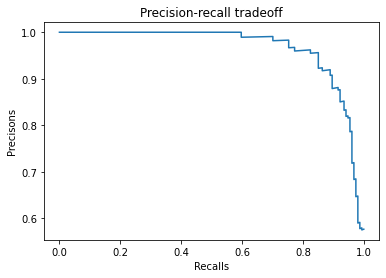

In [65]:
plt.title("Precision-recall tradeoff")

plt.plot(recalls, precisions)

plt.xlabel("Recalls")
plt.ylabel("Precisons")

plt.show()

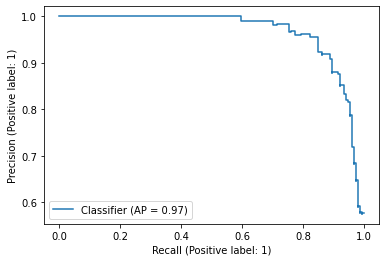

In [66]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(y_test, y_proba_1);

Ou, então:



In [67]:
precisions.shape, recalls.shape, cutoffs.shape

((268,), (268,), (267,))

In [68]:
np.where(precisions == recalls)

(array([113], dtype=int64),)

In [69]:
cutoffs[np.where(precisions == recalls)]

array([0.249])

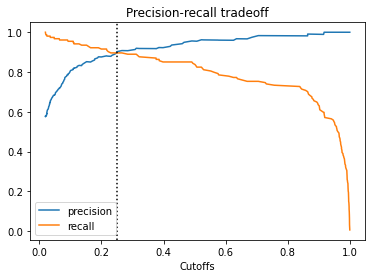

In [70]:
plt.title("Precision-recall tradeoff")

plt.plot(cutoffs, precisions[:-1], label="precision")
plt.plot(cutoffs, recalls[:-1], label="recall")

plt.xlabel("Cutoffs")

ponto_de_encontro = cutoffs[np.where(precisions == recalls)]
plt.axvline(x=ponto_de_encontro, ls=":", color="k")

plt.legend()
plt.show()

________

### Curva ROC e AUC-ROC (AUROC)

Veremos agora uma outra métrica de avaliação de modelos de classificação que é intimamente ligada com os diferentes thresholds possíveis -- a **AUC (Area Under The Curve) da curva ROC (Receiver Operating Characteristics)**, por vezes chamada de **AUROC (Area Under the Receiver Operating Characteristics)**

A curva **ROC é uma curva de probabilidade**, sendo que **AUC é a área sob a curva**, representando **o grau de separabilidade atingido pelo modelo**.

Ou seja, esta medida nos diz **o quanto o modelo é capaz de distinguir entre duas classes**.

A curva ROC é construída com a **taxa de falsos positivos** no eixo x, e a **taxa de verdadeiros positivos** no eixo y, para diferentes **thresholds de classificação**:

<img src="https://miro.medium.com/max/1175/1*2nd7NTEBosPakccmLVWy9A.png" width=500>

O valor do AUC-ROC sempre estará **entre 0 e 1**, sendo que **quanto mais próximo de 1, melhor o modelo**.

> Valores de AUC-ROC maiores que 0.5 (mais próximos de 1) significam que o modelo tem uma **taxa de verdadeiros positivos maior que a taxa de falsos positivos**, ou seja, o modelo está acertando mais!

Quanto **mais próximo de 0** (para valores abaixo de 0.5), teremos um modelo que faz um bom trabalho em separar as classes, mas as classifica erroneamente.

E, quanto **mas próximo de 0.5**, pior é o modelo em separar as classes: seria um modelo que simplesmente chuta aleatoriamente ora a classe 0, ora a classe 1. 

Veja as imagens a seguir para uma ilustração:

<img src="https://miro.medium.com/max/528/1*Uu-t4pOotRQFoyrfqEvIEg.png" width=500>


<img src="https://miro.medium.com/max/507/1*yF8hvKR9eNfqqej2JnVKzg.png" width=500>


<img src="https://miro.medium.com/max/430/1*iLW_BrJZRI0UZSflfMrmZQ.png" width=500>


<img src="https://miro.medium.com/max/556/1*aUZ7H-Lw74KSucoLlj1pgw.png" width=500>

Ao olhar para a curva em si, temos a seguinte interpretação:

<img src="https://i.ytimg.com/vi/J9l8J1MeCbY/hqdefault.jpg" width=400>

Para aprender mais sobre a construção da curva ROC, sugiro [este StatQuest!](https://www.youtube.com/watch?v=4jRBRDbJemM)

In [71]:
from sklearn.metrics import roc_curve

fpr, tpr, cutoffs = roc_curve(y_test, y_proba_1)

Para plotar:

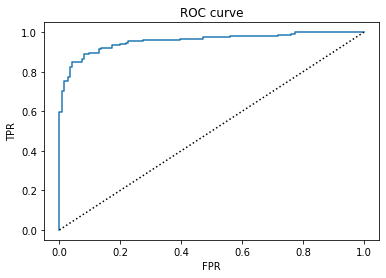

In [72]:
plt.title("ROC curve")

plt.plot(fpr, tpr)

plt.xlabel("FPR")
plt.ylabel("TPR")

x = np.linspace(0, 1, 2)
plt.plot(x, x, color="k", ls=":")

plt.show()

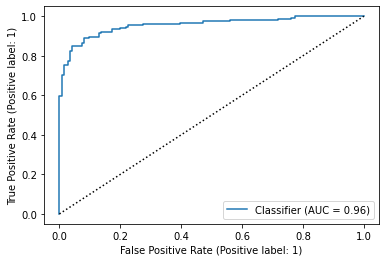

In [73]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_proba_1)

x = np.linspace(0, 1, 2)
plt.plot(x, x, color="k", ls=":");

Por fim, pra calcular o AUC-ROC:

In [74]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_proba_1)

0.9559242127735279

___
___
___

### E se tivermos uma classificação multiclasse?

Há problemas em que temos um problema de **classificação multiclasse**, pois há mais do que duas classes a serem preditas.

<img src="https://utkuufuk.com/2018/06/03/one-vs-all-classification/one-vs-all.png">

Boa noitícia: o operacional de construção e avaliação do modelo com o sklearn muda em absolutamente **nada**.

No entanto, conceitualmente, há algumas mudanças: a rigor, o modelo passa a se chamar **regresão logística MULTINOMIAL**, cujo processo de classificação é dado pela função **softmax**:

<img src="https://i.stack.imgur.com/YLeRi.png" width=600>

Para quem quiser saber mais sobre o "logit score", [clique aqui](https://stats.stackexchange.com/questions/329857/what-is-the-difference-between-decision-function-predict-proba-and-predict-fun).

Essencialmente, esse é o valor do termo linear usado como argumento da sigmoide, isto é, $z(x) = b_0 + b_1 x_1 + \cdots + b_p x_p$

É possível capturar o score pelo método `decision_function`:

In [89]:
X_test.iloc[0]

Daily Time Spent on Site      63.260
Age                           29.000
Area Income                54787.370
Daily Internet Usage         120.460
Male                           1.000
Name: 521, dtype: float64

In [92]:
logit.intercept_, logit.coef_[0]

(array([0.005]), array([-0.056,  0.266, -0.   , -0.027,  0.002]))

In [93]:
(X_test.iloc[0]*logit.coef_[0])

Daily Time Spent on Site   -3.554
Age                         7.712
Area Income                -0.888
Daily Internet Usage       -3.301
Male                        0.002
Name: 521, dtype: float64

In [77]:
logit.intercept_ + (logit.coef_[0]*X_test.iloc[0].values).sum()

array([-0.024])

In [78]:
logit.decision_function(X_test)

array([-0.024,  5.8  ,  2.954,  4.592, -3.478, -0.922, -3.734,  4.678,
       -0.807,  2.906, -3.934,  2.303,  5.903, -3.693,  2.42 ,  5.062,
        6.743,  3.394, -2.281,  4.626, -2.281,  4.309,  5.125, -4.178,
       -3.888,  5.383, -4.737, -4.189,  4.684,  0.999, -4.037,  0.704,
       -3.292,  1.794,  6.158, -2.572, -3.679, -2.077,  1.859,  3.872,
       -4.228,  2.428, -3.709,  4.119, -4.371, -2.188,  4.865,  6.471,
       -3.719,  5.783,  3.919, -4.774,  2.03 , -4.385, -2.075, -2.636,
       -1.847,  6.276, -3.666,  3.21 , -2.477,  4.717, -2.104,  3.533,
        1.972,  3.642,  6.531, -2.691,  0.872,  2.966,  3.577,  0.005,
       -1.919, -2.927,  1.667, -2.679, -3.311,  3.302, -0.036, -2.66 ,
        4.589,  3.338,  0.311,  0.209, -2.505, -3.17 , -3.893, -5.145,
       -2.391, -3.216, -2.341, -1.28 , -2.618,  2.23 , -1.255, -3.409,
        6.644,  2.124, -2.219, -3.504,  2.401, -4.727,  4.83 , -3.371,
        5.476,  0.028,  1.873, -0.413,  4.25 , -3.052,  6.472, -2.799,
      

In [79]:
1/(1 + np.exp(-(logit.intercept_ + (logit.coef_[0]*X_test.iloc[0].values).sum())))

array([0.494])

In [99]:
logit.predict_proba(X_test)[:,1] # Pega todos os números na coluna 1, que representa a classe 1

array([0.494, 0.997, 0.95 , 0.99 , 0.03 , 0.285, 0.023, 0.991, 0.309,
       0.948, 0.019, 0.909, 0.997, 0.024, 0.918, 0.994, 0.999, 0.968,
       0.093, 0.99 , 0.093, 0.987, 0.994, 0.015, 0.02 , 0.995, 0.009,
       0.015, 0.991, 0.731, 0.017, 0.669, 0.036, 0.857, 0.998, 0.071,
       0.025, 0.111, 0.865, 0.98 , 0.014, 0.919, 0.024, 0.984, 0.012,
       0.101, 0.992, 0.998, 0.024, 0.997, 0.981, 0.008, 0.884, 0.012,
       0.112, 0.067, 0.136, 0.998, 0.025, 0.961, 0.077, 0.991, 0.109,
       0.972, 0.878, 0.974, 0.999, 0.064, 0.705, 0.951, 0.973, 0.501,
       0.128, 0.051, 0.841, 0.064, 0.035, 0.965, 0.491, 0.065, 0.99 ,
       0.966, 0.577, 0.552, 0.075, 0.04 , 0.02 , 0.006, 0.084, 0.039,
       0.088, 0.218, 0.068, 0.903, 0.222, 0.032, 0.999, 0.893, 0.098,
       0.029, 0.917, 0.009, 0.992, 0.033, 0.996, 0.507, 0.867, 0.398,
       0.986, 0.045, 0.998, 0.057, 0.959, 0.996, 0.188, 0.522, 0.024,
       0.147, 0.043, 0.46 , 0.902, 0.968, 0.999, 0.025, 0.23 , 0.027,
       0.529, 0.029,

Na lista de exercícios, vocês trabalharão com um problema multiclasse (dataset `iris`). Não deixe de explorar mais a fundo o `decision_function` neste dataset, para entender seu funcionamento!